<a href="https://colab.research.google.com/github/PJ29072004/MyNoteBooks/blob/main/Copy_of_LabAssignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib.pyplot import *
import scipy as sp
from math import comb,factorial,gamma
from numpy import *
from PIL import Image
import requests
from scipy.special import erfi

def Plot(xp,pdf,title,cdf_range=None,discrete=False):
  if cdf_range == None:
    cdf_range = [xp[0],xp[-1]]
  f = figure()
  Pdf = f.add_axes([0.1,0.55,0.3,0.3])
  Cdf = f.add_axes([0.6,0.55,0.3,0.3])
  xc = [cdf_range[0]]
  c = 0
  cdf=[0]
  if discrete:
    dx = 1
  else:
    dx = (xp[-1] - xp[0])/(len(xp)-1)
  for i in range(len(xp)):
    if discrete:
      xc.append(xp[i])
      cdf.append(c)
    c += pdf[i] * dx
    xc.append(xp[i])
    cdf.append(c)
  xc.append(cdf_range[1])
  cdf.append(c)
  if discrete:
    Pdf.bar(xp,pdf,width=0.2)
  else:
    Pdf.plot(xp,pdf)
  Pdf.set_title("Probability Mass function")
  Pdf.set_xlabel("x")
  Pdf.set_ylabel("P [x]")
  Cdf.plot(xc,cdf)
  Cdf.set_title("Cumilitive Distribution")
  Cdf.set_xlabel("x")
  Cdf.set_ylabel("C [x]")
  f.suptitle(title)


# Question 1
Plot the PMF and CDF of Bernoulli, Geometric, Binomial, and Poission random variables. Choose various values of parameters.


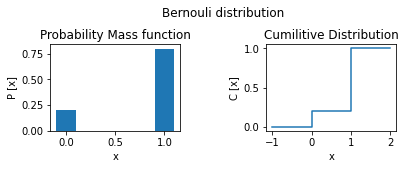

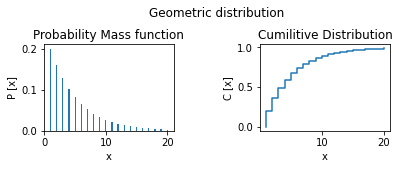

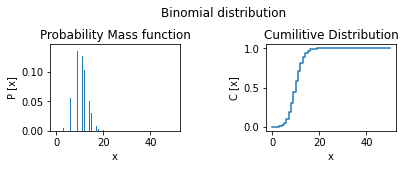

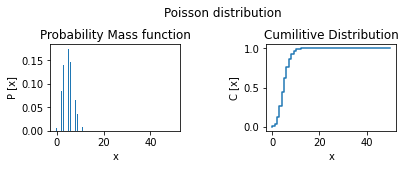

In [ ]:
#bernoulli
p = 0.8
xp = [0,1]
pdf = [1-p,p]
Plot(xp,pdf,"Bernouli distribution",[-1,2],True)

#Geometric
p = 0.2
N = 20
xp = arange(1,N+1)
f = lambda k : ((1-p)**(k-1))*p # k is number of the trial when success happens
pdf = f(xp)
Plot(xp,pdf,"Geometric distribution",discrete = True)

#Binomial
p = 0.2
N = 50
xp = arange(0,N+1)
f = lambda k : comb(N,k)*((1-p)**(N-k))*(p**k) # k is number of successes
pdf = [f(k) for k in xp]
Plot(xp,pdf,"Binomial distribution",discrete = True)

#Poisson 
lam = 5
N = 50
xp = arange(0,N+1)
f = lambda k : ((lam**k)/factorial(k))*exp(-lam)  # k is number of successes
pdf = [f(k) for k in xp]
Plot(xp,pdf,"Poisson distribution",discrete = True)


# Question 2
Show the equivalence and the difference between various choices of parameters for Binomial and Poission distributions. Use both PMF and CDF.

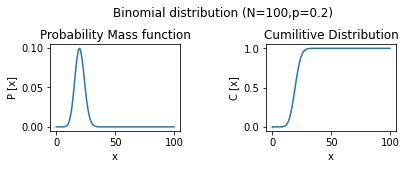

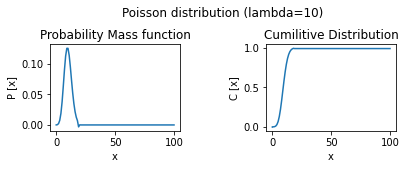

In [ ]:
lam = 10
p = lam/N
N = 100
xp = arange(0,N+1)

#Binomial
f = lambda k : comb(N,k)*((1-p)**(N-k))*(p**k) # k is number of successes
pdf = [f(k) for k in xp]
Plot(xp,pdf,f"Binomial distribution (N={N},p={p})")

#Poisson 
f = lambda k : ((lam**k)/factorial(k))*exp(-lam)  # k is number of successes
pdf = [f(k) for k in xp]
Plot(xp,pdf,f"Poisson distribution (lambda={lam})")

# Question 3
Read an image and add different amounts of Gaussian Noise and display the corrupted images.

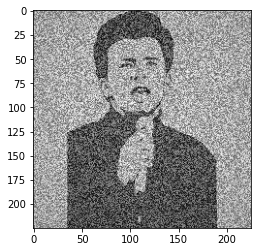

In [ ]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQmgFyDDU7esSqb0iWo0_aLjhpOWWaQtd2GuA&usqp=CAU'
I = asarray(Image.open(requests.get(url,stream=True).raw).convert('L'))
I = I/sum(I)
x = array([arange(I.shape[1])])
y = array([arange(I.shape[0])]).T
x0 = I.shape[1]//2
y0 = I.shape[0]//2
r = random.rand(I.shape[0],I.shape[1])
Noise = exp(-((x-x0)**2 + (y-y0)**2 )/100000) *r
Noise = Noise/sum(Noise)
imshow(I + Noise,cmap='gray')

# Question 4
Plot the PDF and CDF of the following random variables for different parameter values.
- Uniform
- Exponential
- Rayleigh
- Laplacian
- Gaussian (Normal)
- Chi-square
- Erlang
- Log-normal
- Cauchy
- Beta
- Weibull

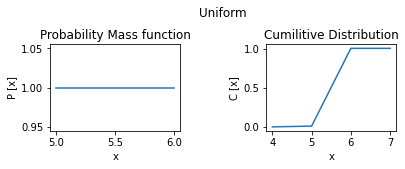

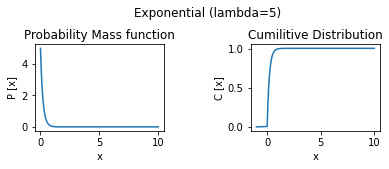

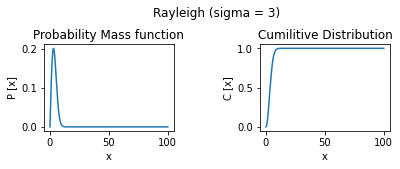

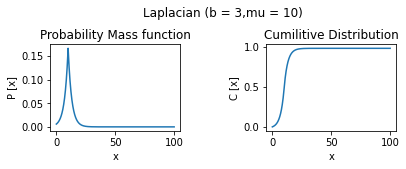

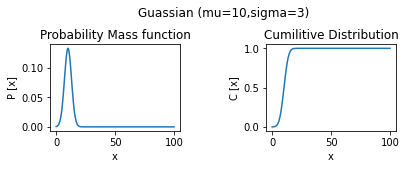

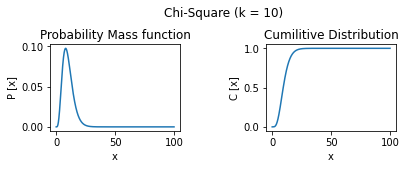

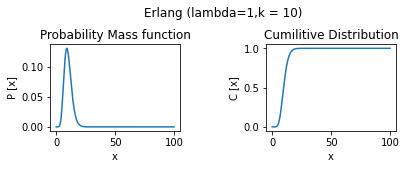

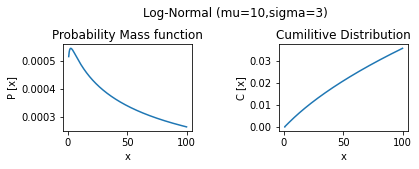

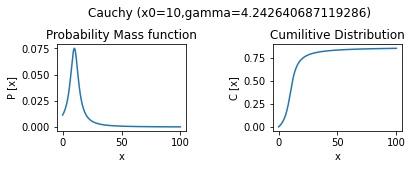

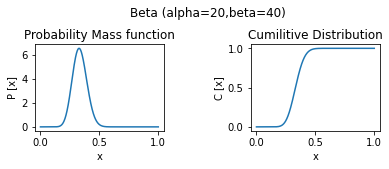

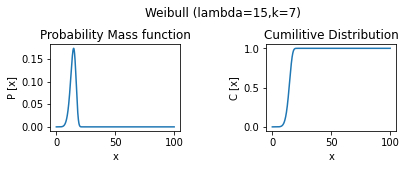

In [ ]:
#uniform
a = 5
b = 6
xp = linspace(a,b,100)
pdf = 0*xp + 1
Plot(xp,pdf,"Uniform",[a-1,b+1])

#Exponential
xp = linspace(0,10,10000)
lam = 5
pdf = lam * exp(-lam*xp)
Plot(xp,pdf,f"Exponential (lambda={lam})",[-1,10])

xp = linspace(0,100,10000)
sig = 3
mu = 10

#Rayleigh
pdf = (xp/(sig**2))*exp(-xp**2 / (2*sig**2)) 
Plot(xp,pdf,f"Rayleigh (sigma = {sig})")

#Laplacian
b = sig
pdf = exp(-absolute(xp - mu)/b)/(2*b)
Plot(xp,pdf,f"Laplacian (b = {b},mu = {mu})")

#Guassian
pdf = exp(-(xp-mu)**2 / (2*sig**2)) / (sig * sqrt(2*pi))
Plot(xp,pdf,f"Guassian (mu={mu},sigma={sig})")

#Chi-square
k = 10 
pdf = xp**(k/2 - 1) * exp(-xp/2) / (2**(k/2) * gamma(k/2))
Plot(xp,pdf,f"Chi-Square (k = {k})")

#Erlang
lam = 1 
k = 10
pdf = lam**k * xp**(k - 1) * exp(-lam*xp) / gamma(k)
Plot(xp,pdf,f"Erlang (lambda={lam},k = {k})")

#Log-Normal
x = linspace(1,100,1000)
pdf = exp(-(log(x)-mu)**2 / (2*sig**2)) / (x * sig * sqrt(2*pi))
Plot(x,pdf,f"Log-Normal (mu={mu},sigma={sig})")

#Cauchy
x0 = mu
gam = sig * sqrt(2)
pdf = (pi*gam*(1+((xp-x0)/gam)**2))**-1
Plot(xp,pdf,f"Cauchy (x0={x0},gamma={gam})")

#Beta
Alpha = 20
Beta = 40
x = linspace(0,1,1000)
C = gamma(Alpha+Beta)/(gamma(Alpha)*gamma(Beta))
pdf = C * x**(Alpha-1) * (1-x)**(Beta-1)
Plot(x,pdf,f"Beta (alpha={Alpha},beta={Beta})")


#Weibull
lam = 15
k = 7
pdf = k * xp**(k-1) * exp(-(xp/lam)**k) * lam**(-k)
Plot(xp,pdf,f"Weibull (lambda={lam},k={k})")

# Question 5
Find the Expectation and variance for all the random variables in Question 1 & 4. Further, find and/or plot their characteristic functions.

In [ ]:
def CPlot(t,z,title):
  zabs = absolute(z)
  zarg = angle(z)
  f = figure(linewidth=10,edgecolor='black',figsize=(8,5),frameon=True)
  ax = f.add_axes([0.1,0.15,0.75,0.7])
  cax = f.add_axes([0.15,0,0.7,0.05])
  c = cm.twilight(zarg/(2*pi)+0.5)
  ax.scatter(t,zabs,color=c)
  ax.set_ylabel("| \u03C6 (t) |",fontsize=12)
  ax.set_xlim([t[0],t[-1]-0.1])
  ax.set_xlabel("t",fontsize=12)
  ax.xaxis.set_label_coords(1.02,-0.025)
  cax.bar(linspace(-pi,pi,100),linspace(1,1,100),color=cm.twilight(linspace(0,1,100)))
  cax.set_xlim([-pi,pi])
  cax.set_yticks([])
  cax.set_xticks([-pi,0,pi],labels=["- \u03C0","0","\u03C0"])
  f.text(0,0," arg ( \u03C6 (t) ) :",fontsize=12)
  f.suptitle(f"\n Characteristic function of {title} distribution",fontsize=12)

<ipython-input-163-668aeef16a92>:28: RuntimeWarning: invalid value encountered in true_divide
  z = (exp(1j*b*t) - exp(1j*a*t))/((b-a)*t + 0j)
<ipython-input-163-668aeef16a92>:41: RuntimeWarning: invalid value encountered in multiply
  z = 1 - (sig*t*exp(-((sig*t)**2)/2)*sqrt(pi/2) + 0j)*z


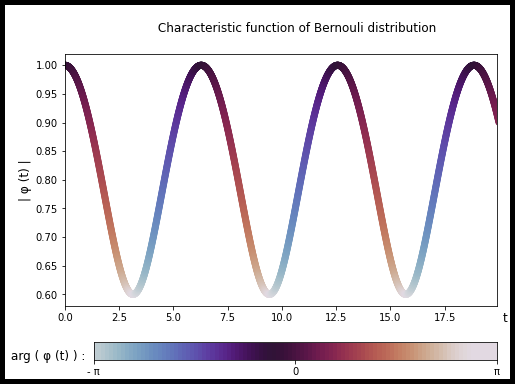

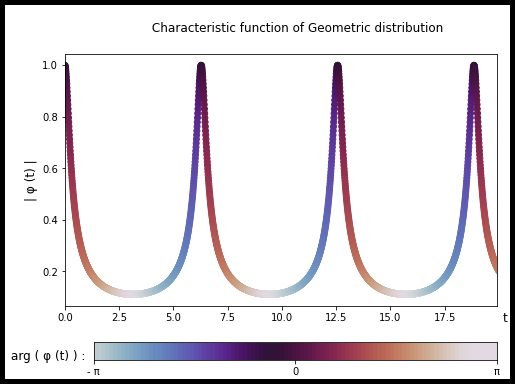

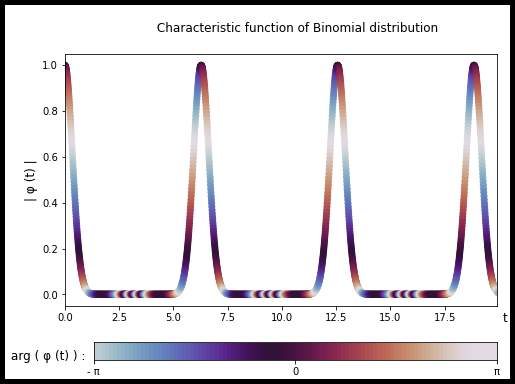

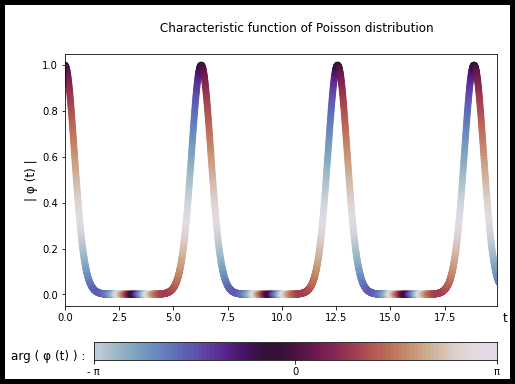

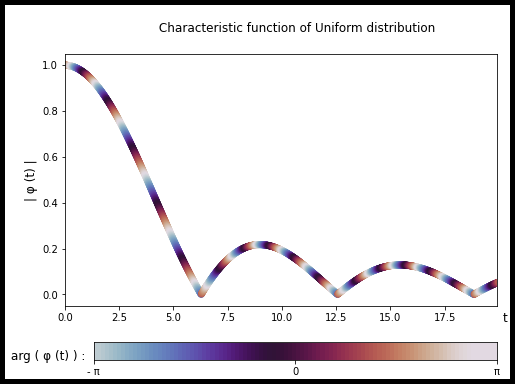

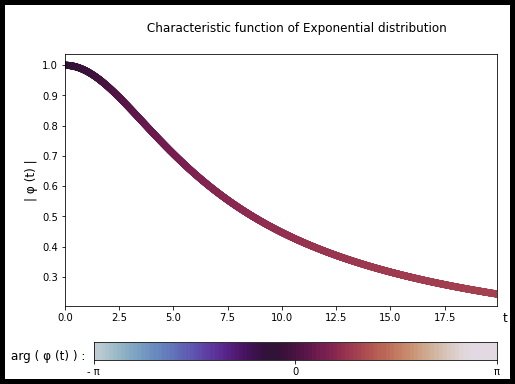

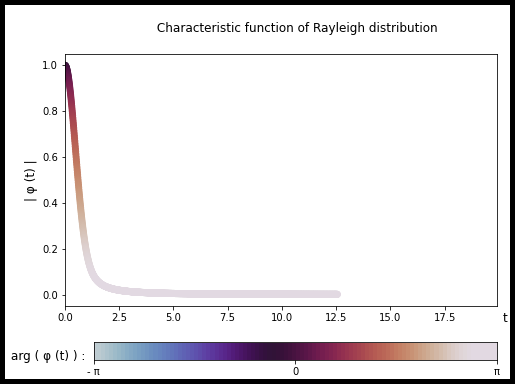

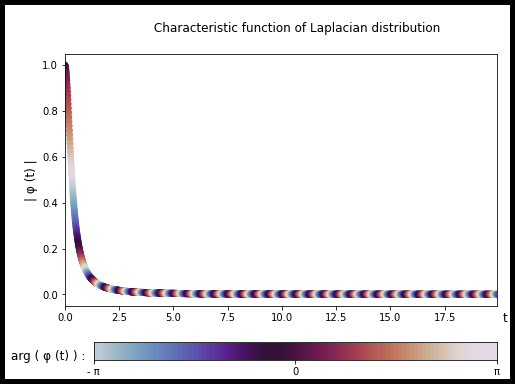

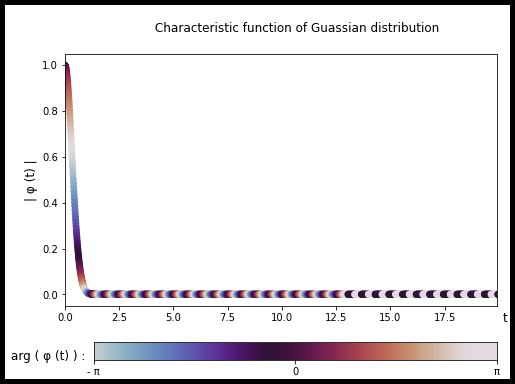

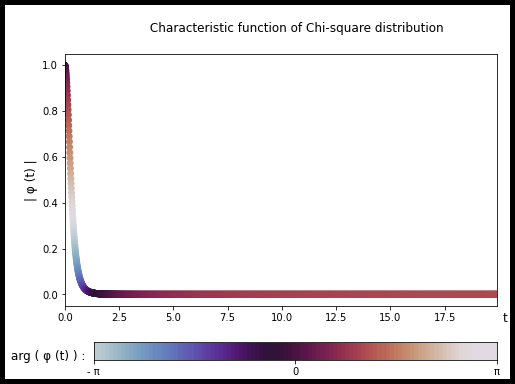

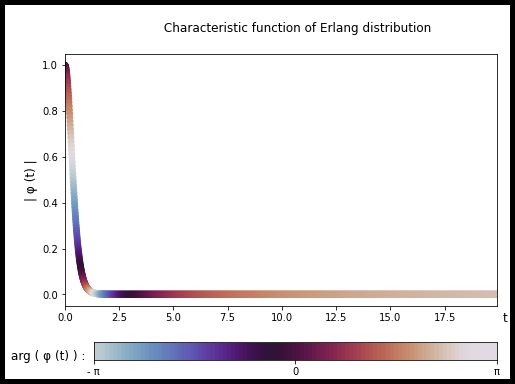

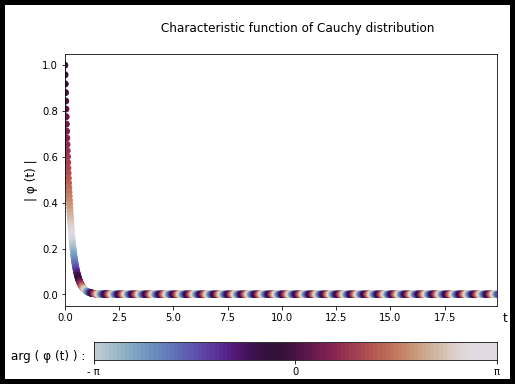

In [ ]:
t = linspace(0,20,2000)

#bernoulli
p = 0.8
z = (1-p) + p*exp(1j*t)
CPlot(t,z,"Bernouli")

#Geometric
p = 0.2
z = p/(exp(-1j*t) - (1-p))
CPlot(t,z,"Geometric")

#Binomial
p = 0.2
N = 50
z = (1-p + p*exp(1j*t))**N
CPlot(t,z,"Binomial")

#Poisson 
lam = 5
N = 50
z = exp(lam*(exp(1j*t) - 1))
CPlot(t,z,"Poisson")

#uniform
a = 5
b = 6
z = (exp(1j*b*t) - exp(1j*a*t))/((b-a)*t)
CPlot(t,z,"Uniform")

#Exponential
lam = 5
z = 1/(1-1j*t/lam)
CPlot(t,z,"Exponential")

sig = 3
mu = 10

#Rayleigh : Involves non elementary functions
z = erfi((sig*t/sqrt(2))) - 1j
z = 1 - (sig*t*exp(-((sig*t)**2)/2)*sqrt(pi/2))*z
CPlot(t,z,"Rayleigh")

#Laplacian
b = sig
z = exp(1j*mu*t)/(1+(b*t)**2)
CPlot(t,z,"Laplacian")

#Guassian
z = exp(-((sig*t)**2)/2 + 1j*mu*t)
CPlot(t,z,"Guassian")

#Chi-square
k = 10 
z = (1-2j*t)**(-k/2)
CPlot(t,z,"Chi-square")

#Erlang
lam = 1 
k = 10
z = (1-1j*t/lam)**(-k)
CPlot(t,z,"Erlang")

#Log-Normal : Involves infinite series

#Cauchy
x0 = mu
gam = sig * sqrt(2)
z = exp(1j*t*x0 - gam*absolute(t))
CPlot(t,z,"Cauchy")

#Beta : Involves non elementary functions

#Weibull : Involves infinite series
